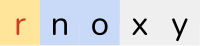
<div style="clear:both"></div>
Rafał Nowak<br/>
<a href="https://github.com/rnoxy">github.com/rnoxy</a>

# Pytorch models (`nn.Module`)

In [1]:
import torch

# Linear models

<img src="img/ann.svg" width="50%">

In [2]:
# Input
X_input = torch.randn(10, 4) ### tensor,  N x 4
X_input.shape

torch.Size([10, 4])

## `torch.nn.Linear`

In [3]:
from torch.nn import Linear

In [4]:
model_1 = Linear(4, 5)
model_2 = Linear(5, 7)
model_3 = Linear(7, 3)

def model(x):
    x = model_1(x)
    x = torch.tanh(x)
    x = model_2(x)
    x = torch.tanh(x)
    logits = model_3(x)
    return logits

In [5]:
model(X_input)

tensor([[-0.2232,  0.0404, -0.0912],
        [ 0.2082,  0.3690, -0.0370],
        [ 0.1019,  0.2788, -0.0246],
        [ 0.2656,  0.4020, -0.0071],
        [ 0.1335,  0.1268,  0.1896],
        [-0.3925, -0.2287,  0.1415],
        [ 0.0502,  0.3030, -0.1084],
        [-0.0103,  0.0464,  0.1387],
        [ 0.1726,  0.3016, -0.0038],
        [-0.2446,  0.0146, -0.0266]], grad_fn=<AddmmBackward0>)

In [6]:
torch.softmax( model(X_input), dim=1 )[:5]

tensor([[0.2905, 0.3781, 0.3315],
        [0.3382, 0.3972, 0.2647],
        [0.3252, 0.3882, 0.2866],
        [0.3439, 0.3942, 0.2618],
        [0.3278, 0.3256, 0.3467]], grad_fn=<SliceBackward0>)

## `torch.nn.Module`

In [7]:
class MyModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model_1 = Linear(4, 5)
        self.model_2 = Linear(5, 7)
        self.model_3 = Linear(7, 3)

In [8]:
model = MyModel()

In [9]:
list(p for p in model.parameters())

[Parameter containing:
 tensor([[-0.2501, -0.2382,  0.0966,  0.1455],
         [ 0.0045,  0.0778, -0.3297, -0.0694],
         [-0.0651, -0.3212,  0.4831, -0.2630],
         [ 0.2281,  0.2680,  0.1674, -0.4119],
         [ 0.3236,  0.1853, -0.0383,  0.4128]], requires_grad=True),
 Parameter containing:
 tensor([-0.4814,  0.0899,  0.1293, -0.1786,  0.4391], requires_grad=True),
 Parameter containing:
 tensor([[ 0.0117,  0.0994,  0.0638, -0.0736, -0.2982],
         [-0.1293, -0.4426,  0.0915,  0.0881,  0.1637],
         [-0.1807, -0.3957,  0.0359,  0.0587, -0.3791],
         [-0.0513, -0.0265,  0.3580, -0.3973,  0.1492],
         [-0.3142, -0.0182,  0.0856,  0.4134, -0.3508],
         [ 0.0838,  0.1784, -0.2986, -0.1688, -0.0129],
         [-0.4130,  0.3724, -0.0811, -0.4219, -0.2072]], requires_grad=True),
 Parameter containing:
 tensor([-0.3803, -0.4185, -0.3999,  0.2503, -0.0925,  0.3735, -0.3685],
        requires_grad=True),
 Parameter containing:
 tensor([[-0.2599,  0.1351,  0.2980,

In [10]:
list(p.shape for p in model.parameters())

[torch.Size([5, 4]),
 torch.Size([5]),
 torch.Size([7, 5]),
 torch.Size([7]),
 torch.Size([3, 7]),
 torch.Size([3])]

In [11]:
sum(p.numel() for p in model.parameters())

91

In [13]:
# model(X_input) # --> NotImplementedError

### `forward(x)`

In [17]:
class MyModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model_1 = Linear(4, 5)
        self.model_2 = Linear(5, 7)
        self.model_3 = Linear(7, 3)
    
    def forward(self, x):
        x = self.model_1(x)
        x = torch.tanh(x)
        x = self.model_2(x)
        x = torch.tanh(x)
        x = self.model_3(x) # logits
        return x

In [18]:
model = MyModel()

In [19]:
model(X_input)

tensor([[-0.1078, -0.2213,  0.3109],
        [-0.2863, -0.1555,  0.3096],
        [ 0.0231, -0.5331,  0.1133],
        [-0.0299, -0.4571,  0.1467],
        [ 0.1102, -0.4696,  0.2299],
        [ 0.2339, -0.5825,  0.1450],
        [-0.1765, -0.2206,  0.2782],
        [ 0.0843, -0.5875,  0.1477],
        [ 0.1531, -0.7359,  0.0648],
        [ 0.0805, -0.4202,  0.1711]], grad_fn=<AddmmBackward0>)